In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from keras.utils import plot_model

In [0]:
!unzip /content/sample_data/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/anime_myset/fairy_tale/fairy_tale2(86).jpg  
  inflating: dataset/anime_myset/fairy_tale/fairy_tale2(9).jpg  
  inflating: dataset/anime_myset/fairy_tale/fairy_tale2.jpg  
   creating: dataset/anime_myset/fullmetal_alchemist/
  inflating: dataset/anime_myset/fullmetal_alchemist/fma (1).jpg  
  inflating: dataset/anime_myset/fullmetal_alchemist/fma (10).jpg  
  inflating: dataset/anime_myset/fullmetal_alchemist/fma (11).jpg  
  inflating: dataset/anime_myset/fullmetal_alchemist/fma (12).jpg  
  inflating: dataset/anime_myset/fullmetal_alchemist/fma (13).jpg  
  inflating: dataset/anime_myset/fullmetal_alchemist/fma (14).jpg  
  inflating: dataset/anime_myset/fullmetal_alchemist/fma (15).jpg  
  inflating: dataset/anime_myset/fullmetal_alchemist/fma (16).jpg  
  inflating: dataset/anime_myset/fullmetal_alchemist/fma (17).jpg  
  inflating: dataset/anime_myset/fullmetal_alchemist/fma (18).jpg  
  inflating: dataset/an

In [0]:
categories = ["anime", "cartoon"]
data_set_folder = "/content/dataset"
IMG_SIZE = 64
training_data = []

In [68]:
def create_training_data():
  print("Creating training data...")
  for category in categories:
    print("Create data for " + category + "...")
    path = os.path.join(data_dir, category)
    class_num = categories.index(category) #0 anime, 1 cartoon
    for folder in os.listdir(path):
      path2 = os.path.join(path, folder)
      for img in os.listdir(path2):
        try:
          img_array = cv2.imread(os.path.join(path2, img))
          img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([img_array, class_num])
        except Exception as e:
          pass
  random.shuffle(training_data)

def generate_data():
  print("Generate train_x, train_y...")
  train_x, train_y = [], []
  for features, label in training_data:
    train_x.append(features)
    train_y.append(label)
  train_x = np.array(train_x).reshape(-1, IMG_SIZE, IMG_SIZE, 3) #3 mert színes
  train_y = np.array(train_y)
  train_x = train_x/255.0 #normalizáljuk a pixeleket
  return train_x, train_y

create_training_data()
train_x, train_y = generate_data()
print(train_x.shape)

Creating training data...
Create data for anime...
Create data for cartoon...
Generate train_x, train_y...
(5734, 64, 64, 3)


In [69]:
print("Build network...")
model = Sequential()
model.add(Conv2D(64, (3,3), activation = "relu", input_shape = train_x.shape[1:])) #mert a -1 shape nem kell
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))
model.summary()
print("Start training...")
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(train_x, train_y, batch_size = 32, epochs = 5, validation_split = 0.3) #lehet csinálni olyat, hogy validation_split

Build network...
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 6

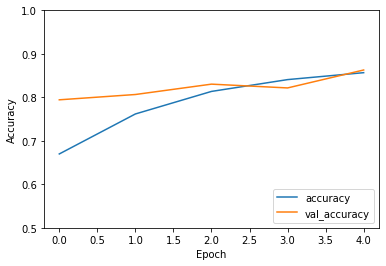

In [70]:
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc = "lower right")

Test some interesting examples...


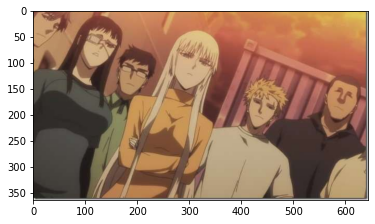

/content/test/jormungand.jpg:: Cartoon: 10.49% , Anime: 89.51%


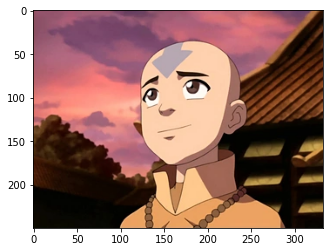

<Figure size 432x288 with 0 Axes>

/content/test/aang2.jpg:: Cartoon: 55.6% , Anime: 44.4%


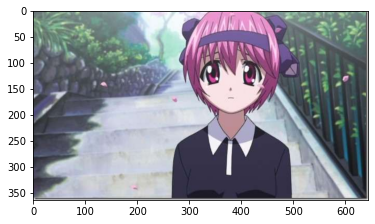

<Figure size 432x288 with 0 Axes>

/content/test/elfen lied.jpg:: Cartoon: 1.43% , Anime: 98.57%


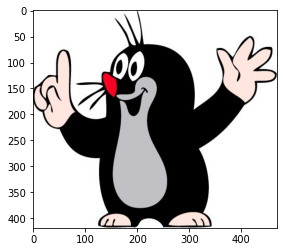

<Figure size 432x288 with 0 Axes>

/content/test/kisvakond-1.jpg:: Cartoon: 99.0% , Anime: 1.0%


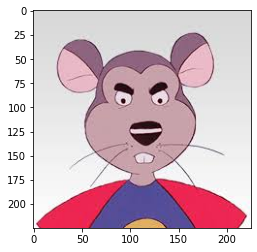

<Figure size 432x288 with 0 Axes>

/content/test/macska2.jpg:: Cartoon: 95.47% , Anime: 4.53%


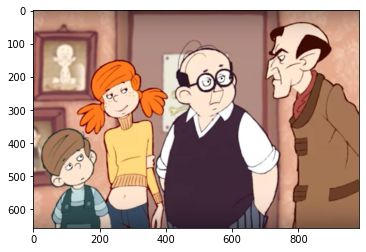

<Figure size 432x288 with 0 Axes>

/content/test/mezga1.jpg:: Cartoon: 53.73% , Anime: 46.27%


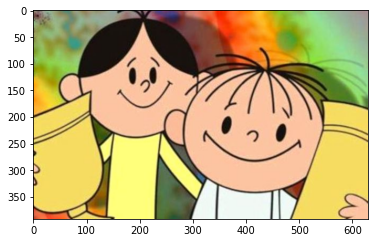

<Figure size 432x288 with 0 Axes>

/content/test/lolka_bolka.jpg:: Cartoon: 87.21% , Anime: 12.79%


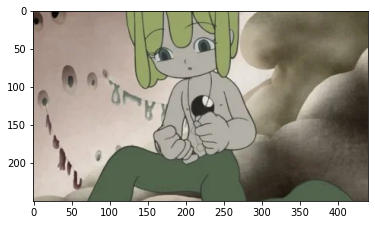

<Figure size 432x288 with 0 Axes>

/content/test/kaiba2.jpg:: Cartoon: 15.04% , Anime: 84.96%


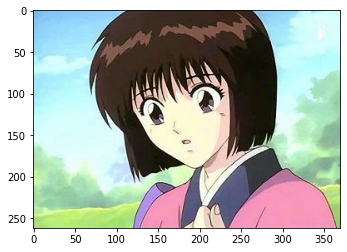

<Figure size 432x288 with 0 Axes>

/content/test/ruroni_kensin.jpg:: Cartoon: 15.42% , Anime: 84.58%


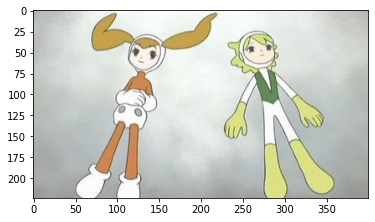

<Figure size 432x288 with 0 Axes>

/content/test/kaiba1.jpg:: Cartoon: 21.66% , Anime: 78.34%


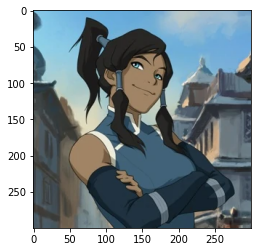

<Figure size 432x288 with 0 Axes>

/content/test/korra.jpg:: Cartoon: 3.23% , Anime: 96.77%


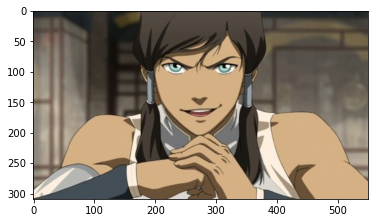

<Figure size 432x288 with 0 Axes>

/content/test/korra2.jpg:: Cartoon: 8.91% , Anime: 91.09%


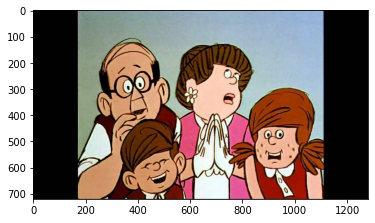

<Figure size 432x288 with 0 Axes>

/content/test/mezga2.jpg:: Cartoon: 94.19% , Anime: 5.81%


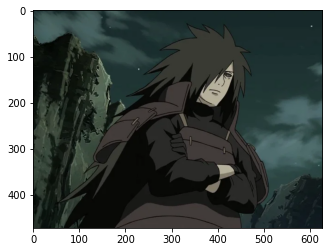

<Figure size 432x288 with 0 Axes>

/content/test/madara.jpg:: Cartoon: 2.66% , Anime: 97.34%


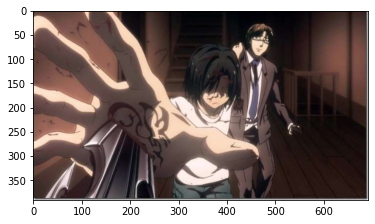

<Figure size 432x288 with 0 Axes>

/content/test/taboo tattooo.jpg:: Cartoon: 0.22% , Anime: 99.78%


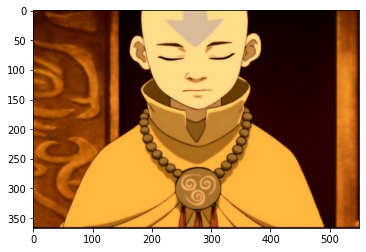

<Figure size 432x288 with 0 Axes>

/content/test/aang.jpg:: Cartoon: 89.31% , Anime: 10.69%


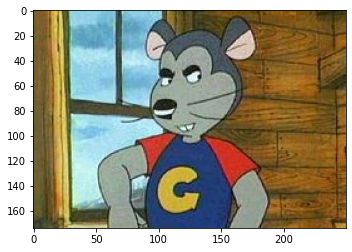

<Figure size 432x288 with 0 Axes>

/content/test/macska.jpg:: Cartoon: 79.15% , Anime: 20.85%


In [71]:
print("Test some interesting examples...")
test_path = "/content/test"
test_data = list()
for i, img in enumerate(os.listdir(test_path)):
  try:
    img_array = cv2.imread(os.path.join(test_path, img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.figure(i+1)
    plt.show()
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    img_array = np.array(img_array).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    img_array = img_array/255.0
    prediction = model.predict(img_array)
    percentage = prediction[0][0]*100
    print(os.path.join(test_path, img)+ ":: Cartoon: " + str(round(percentage, 2)) + "% , Anime: " + str(round(100 - percentage, 2)) + "%")
  except Exception as e:
    pass



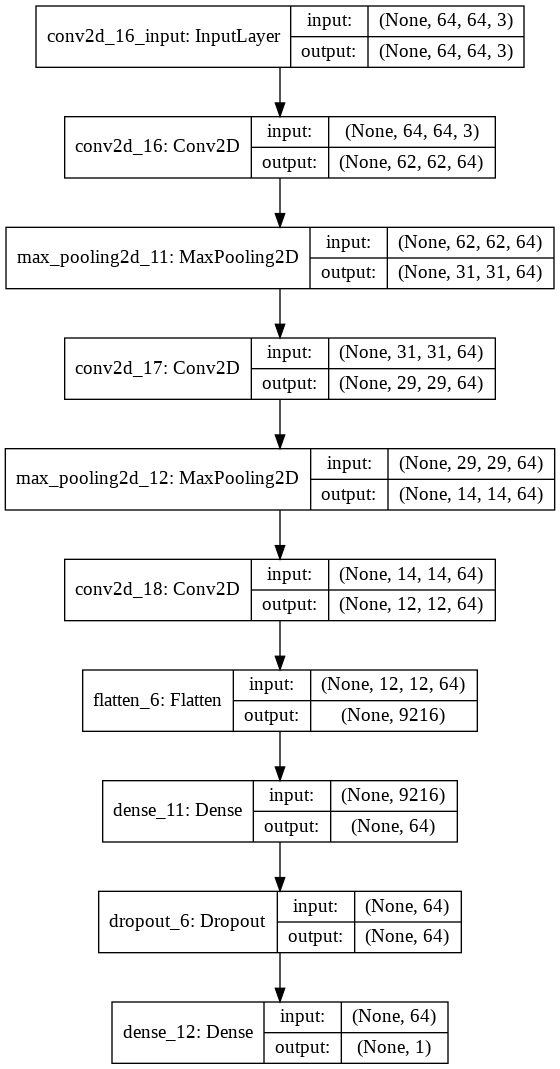

In [0]:
plot_model(model, to_file='model.png', show_shapes=True)